# Cyst Detection on Ovaries

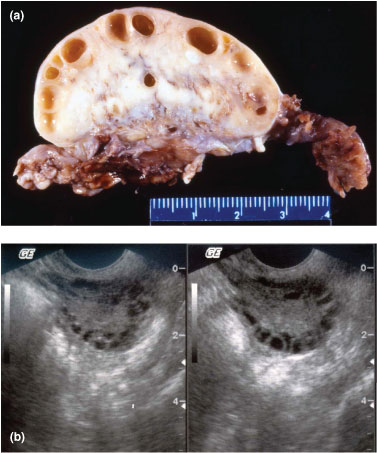

In [ ]:
!pip install opencv-python
!pip install scikit-learn


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np



In [126]:

root_dir = '/content/drive/MyDrive/cyst_detection'


In [127]:

infected_dir = os.path.join(root_dir, 'infected')
not_infected_dir = os.path.join(root_dir, 'notinfected')


In [128]:

image_paths = []
labels = []


## Adding labels
* for infected - 1
* for not infected - 0

In [129]:

for filename in os.listdir(infected_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(infected_dir, filename)
        image_paths.append(image_path)
        labels.append(1)

for filename in os.listdir(not_infected_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(not_infected_dir, filename)
        image_paths.append(image_path)
        labels.append(0)



In [130]:

assert len(image_paths) == len(labels), "Number of images and labels do not match"


In [131]:

images = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))
    image = image / 255.0
    images.append(image)

images = np.array(images)
labels = np.array(labels)


In [132]:
images

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.0745098 , 0.06666667, 0.06666667],
         [0.0745098 , 0.06666667, 0.06666667]

In [133]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## Test and Train data generation

In [134]:

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


## Model Creation

In [135]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [137]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## Model Training

In [138]:

history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
2/2 [==============================] - 4s 2s/step - loss: 1.2770 - accuracy: 0.5088 - val_loss: 0.6325 - val_accuracy: 0.5333
Epoch 2/10
2/2 [==============================] - 4s 2s/step - loss: 0.6632 - accuracy: 0.5088 - val_loss: 0.7245 - val_accuracy: 0.4667
Epoch 3/10
2/2 [==============================] - 3s 1s/step - loss: 0.6755 - accuracy: 0.5614 - val_loss: 0.6225 - val_accuracy: 0.5333
Epoch 4/10
2/2 [==============================] - 2s 787ms/step - loss: 0.6114 - accuracy: 0.5439 - val_loss: 0.5702 - val_accuracy: 0.5333
Epoch 5/10
2/2 [==============================] - 2s 758ms/step - loss: 0.5532 - accuracy: 0.7018 - val_loss: 0.5008 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 2s 792ms/step - loss: 0.4381 - accuracy: 1.0000 - val_loss: 0.4341 - val_accuracy: 0.7333
Epoch 7/10
2/2 [==============================] - 2s 771ms/step - loss: 0.3532 - accuracy: 0.9474 - val_loss: 0.3373 - val_accuracy: 1.0000
Epoch 8/10
2/2 [=============

In [139]:

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


1/1 [==============================] - 0s 147ms/step - loss: 0.1331 - accuracy: 0.9444
Test accuracy: 0.9444444179534912


## Detection of cysts on sample images


In [140]:
kernel_size = (4,4)
sigma_x = 1.0
sigma_y = 1.0
kernel_x = cv2.getGaussianKernel(kernel_size[0], sigma_x)
kernel_y = cv2.getGaussianKernel(kernel_size[1], sigma_y)
gaussian_kernel = np.outer(kernel_x, kernel_y)
print("Two-dimensional Gaussian Kernel:")
print(gaussian_kernel)

Two-dimensional Gaussian Kernel:
[[0.01501667 0.04625459 0.04625459 0.01501667]
 [0.04625459 0.14247416 0.14247416 0.04625459]
 [0.04625459 0.14247416 0.14247416 0.04625459]
 [0.01501667 0.04625459 0.04625459 0.01501667]]


In [141]:
def detect_cysts(image_path):
    image = cv2.imread(image_path)
    sample_image = cv2.resize(image, (128, 128))
    sample_image = np.expand_dims(sample_image, axis=0)
    sample_image = sample_image / 255.0
    prediction = model.predict(sample_image)
    predicted_class = "Infected" if prediction > 0.5 else "Not Infected"
    print("Predicted class:", predicted_class)

    if predicted_class == "Infected":
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        height = image.shape[0]
        width = image.shape[1]
        eroded_image = cv2.erode(gray_image, gaussian_kernel, iterations=1)
        image1_resized = cv2.resize(image, (width, height))
        _, thresholded_image = cv2.threshold(eroded_image, 20, 255, cv2.THRESH_BINARY)
        thresholded_image_rgb = cv2.cvtColor(thresholded_image, cv2.COLOR_GRAY2RGB)
        plt.imshow(thresholded_image_rgb)
        plt.title('Image with cysts')
        plt.axis('off')
        plt.show()
        inverse_thresholded_image = 255 - thresholded_image
        inverse_thresholded_image_rgb = 255 - thresholded_image_rgb

        plt.imshow(inverse_thresholded_image_rgb)
        plt.title('Inverse Thresholded Image')
        plt.axis('off')
        plt.show()
        contours, _ = cv2.findContours(inverse_thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        print("Number of contours detected:", len(contours))
        infected_image_with_contours = sample_image[0].copy()
        cv2.drawContours(infected_image_with_contours, contours, -1, (0, 255, 0), 2)
        infected_image_with_contours_uint8 = cv2.convertScaleAbs(infected_image_with_contours)
        rgb_image = cv2.cvtColor(infected_image_with_contours_uint8, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_image)
        plt.title('Infected Image with Cysts Contours')
        plt.axis('off')
        plt.show()
    else:
        print("Not Infected")
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        height = image.shape[0]
        width = image.shape[1]
        eroded_image = cv2.erode(gray_image, gaussian_kernel, iterations=1)
        image1_resized = cv2.resize(image, (width, height))
        _, thresholded_image = cv2.threshold(eroded_image, 20, 255, cv2.THRESH_BINARY)
        thresholded_image_rgb = cv2.cvtColor(thresholded_image, cv2.COLOR_GRAY2RGB)
        plt.imshow(thresholded_image_rgb)
        plt.title('Image without cysts')
        plt.axis('off')
        plt.show()
        inverse_thresholded_image = 255 - thresholded_image
        inverse_thresholded_image_rgb = 255 - thresholded_image_rgb

        plt.imshow(inverse_thresholded_image_rgb)
        plt.title('Inverse Thresholded Image')
        plt.axis('off')
        plt.show()



1/1 [==============================] - 0s 138ms/step
Predicted class: Infected


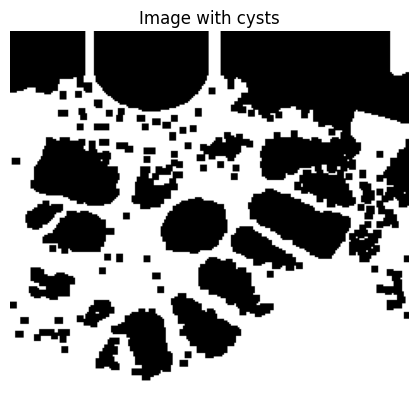

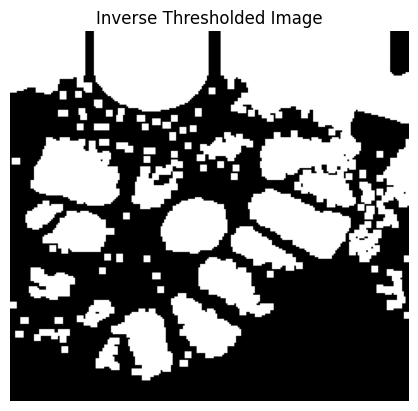

Number of contours detected: 73


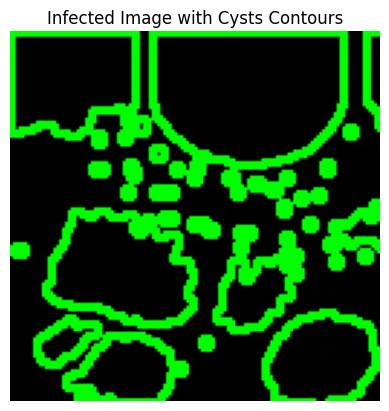

In [142]:
detect_cysts('/content/drive/MyDrive/cyst_detection/SAMPLE_ovaries/img_0_492.jpg')

1/1 [==============================] - 0s 58ms/step
Predicted class: Not Infected
Not Infected


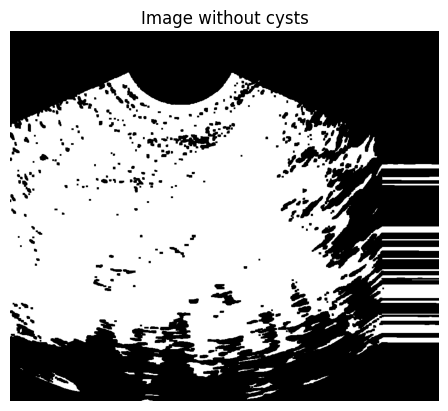

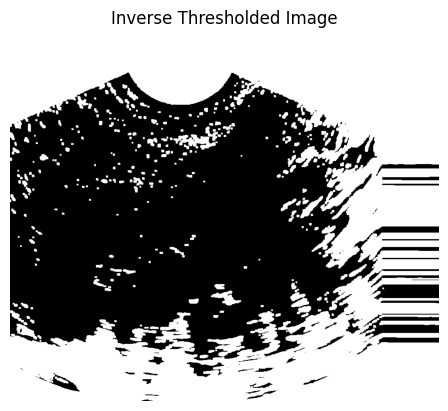

In [143]:
detect_cysts('/content/drive/MyDrive/cyst_detection/SAMPLE_ovaries/img_0_0.jpg')

1/1 [==============================] - 0s 50ms/step
Predicted class: Infected


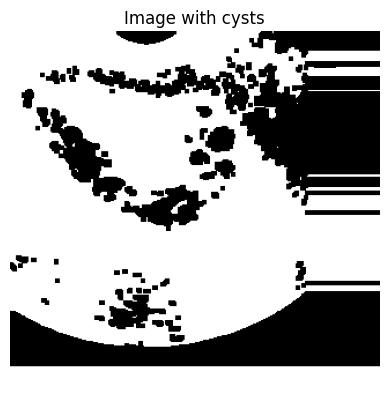

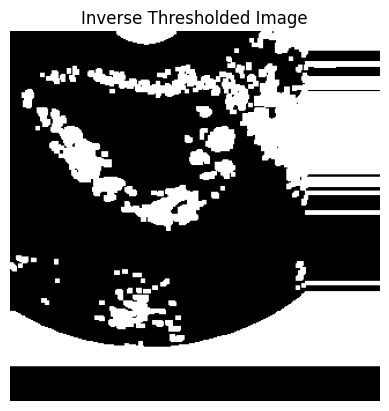

Number of contours detected: 60


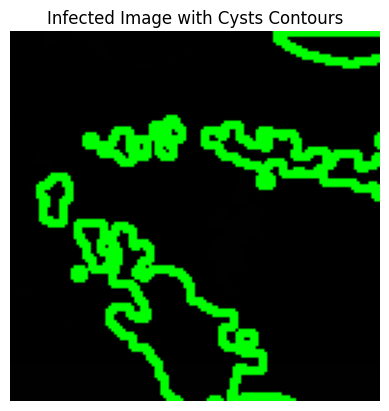

In [144]:
detect_cysts("/content/drive/MyDrive/cyst_detection/SAMPLE_ovaries/img_0_693.jpg")